In [1]:
import dlib
#import argparse
#import cv2
#import sys
#import time
import matplotlib.pyplot as plt
import face_recognition
import PIL.Image
import PIL.ImageDraw

In [2]:
# Load the jpg file into a numpy array
image = face_recognition.load_image_file('./input/image1.jpg')

# Find all the faces in the image
face_locations = face_recognition.face_locations(image)

number_of_faces = len(face_locations)
print("I found {} face(s) in this photograph.".format(number_of_faces))

I found 1 face(s) in this photograph.


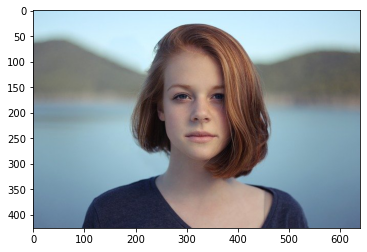

In [3]:
plt.imshow(image)

### Face detection

In [4]:
# Load the image into a Python Image Library object so that we can draw on top of it and display it
pil_image = PIL.Image.fromarray(image)

for face_location in face_locations:

    # Print the location of each face in this image. Each face is a list of co-ordinates in (top, right, bottom, left) order.
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # Let's draw a box around the face
    draw = PIL.ImageDraw.Draw(pil_image)
    draw.rectangle([left, top, right, bottom], outline="red", width = 3)

A face is located at pixel location Top: 133, Left: 253, Bottom: 288, Right: 408


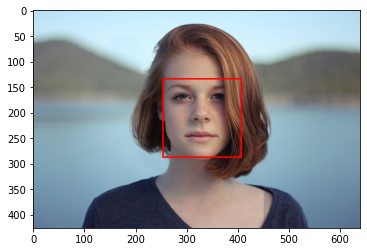

In [5]:
plt.imshow(pil_image)

### Face landmark

In [6]:
face_landmarks_list = face_recognition.face_landmarks(image, model = 'small')
number_of_faces = len(face_landmarks_list)
print("I found {} face(s) in this photograph.".format(number_of_faces))

I found 1 face(s) in this photograph.


In [7]:
pil_image = PIL.Image.fromarray(image)

# Create a PIL drawing object to be able to draw lines later
draw = PIL.ImageDraw.Draw(pil_image)

# Loop over each face
for face_landmarks in face_landmarks_list:

    # Loop over each facial feature (eye, nose, mouth, lips, etc)
    for name, list_of_points in face_landmarks.items():

        # Print the location of each facial feature in this image
        print("The {} in this face has the following points: {}".format(name, list_of_points))

        # Let's trace out each facial feature in the image with a line!
        draw.line(list_of_points, fill="red", width=5)

The nose_tip in this face has the following points: [(328, 221)]
The left_eye in this face has the following points: [(279, 172), (306, 172)]
The right_eye in this face has the following points: [(371, 172), (347, 173)]


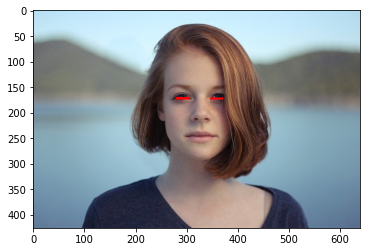

In [8]:
plt.imshow(pil_image)

### Face enconding

In [9]:
face_encodings = face_recognition.face_encodings(image)
if len(face_encodings) == 0: print("No faces were found.")

### Face Recognition

use upsampling if you have problem </br>
face_locations = face_recognition.face_locations(unknown_image, number_of_times_to_upsample=2) </br>
unknown_face_encodings = face_recognition.face_encodings(unknown_image, known_face_locations=face_locations)

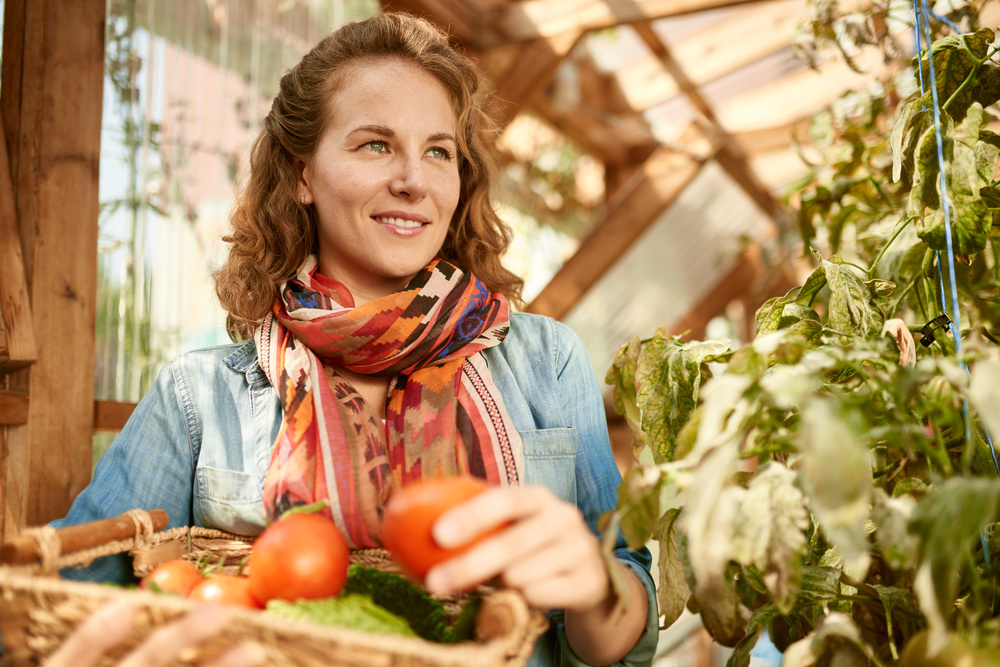

In [10]:
image2 = face_recognition.load_image_file('./input/person_2.jpg')
PIL.Image.fromarray(image2)

In [11]:
face_encodings2 = face_recognition.face_encodings(image2)

In [12]:
known_face_encodings = [
    face_encodings[0],
    face_encodings2[0]
]
face_recognition.compare_faces(known_face_encodings, face_encodings[0], tolerance=0.6)

[True, False]